## 线性回归

In [9]:
import numpy as np
import matplotlib.pylab as plt
from numpy import *

In [6]:
def loadDataSet(fileName):                 
    """ 加载数据
        解析以tab键分隔的文件中的浮点数
    Returns：
        dataMat ：  feature 对应的数据集
        labelMat ： feature 对应的分类标签，即类别标签

    """
    # 获取样本特征的总数，不算最后的目标变量 
    numFeat = len(open(fileName).readline().split('\t')) - 1 
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        # 读取每一行
        lineArr =[]
        # 删除一行中以tab分隔的数据前后的空白符号
        curLine = line.strip().split('\t')
        # i 从0到2，不包括2 
        for i in range(numFeat):
            # 将数据添加到lineArr List中，每一行数据测试数据组成一个行向量           
            lineArr.append(float(curLine[i]))
            # 将测试数据的输入数据部分存储到dataMat 的List中
        dataMat.append(lineArr)
        # 将每一行的最后一个数据，即类别，或者叫目标变量存储到labelMat List中
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat


def standRegres(xArr,yArr):
    '''
    Description：
        线性回归
    Args:
        xArr ：输入的样本数据，包含每个样本数据的 feature
        yArr ：对应于输入数据的类别标签，也就是每个样本对应的目标变量
    Returns:
        ws：回归系数
    '''

    # mat()函数将xArr，yArr转换为矩阵 mat().T 代表的是对矩阵进行转置操作
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 矩阵乘法的条件是左矩阵的列数等于右矩阵的行数
    xTx = xMat.T*xMat
    # 因为要用到xTx的逆矩阵，所以事先需要确定计算得到的xTx是否可逆，条件是矩阵的行列式不为0
    # linalg.det() 函数是用来求得矩阵的行列式的，如果矩阵的行列式为0，则这个矩阵是不可逆的，就无法进行接下来的运算                   
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    # 最小二乘法
    # http://www.apache.wiki/pages/viewpage.action?pageId=5505133
    # 书中的公式，求得w的最优解
    ws = xTx.I * (xMat.T*yMat)            
    return ws


In [15]:
def regression1():
    xArr, yArr = loadDataSet("8.Regression/data.txt")
    xMat = mat(xArr)
    yMat = mat(yArr)
    ws = standRegres(xArr, yArr)
    fig = plt.figure()
    ax = fig.add_subplot(111)               #add_subplot(349)函数的参数的意思是，将画布分成3行4列图像画在从左到右从上到下第9块
    ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0]) #scatter 的x是xMat中的第二列，y是yMat的第一列
    xCopy = xMat.copy() 
    xCopy.sort(0)
    yHat = xCopy * ws
    ax.plot(xCopy[:, 1], yHat)
    plt.show()

In [12]:
xArr, yArr = loadDataSet("8.Regression/data.txt")

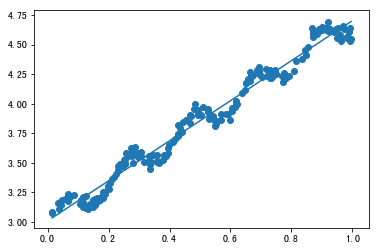

In [16]:
regression1()